# Assignment 4

In [1]:
# imports and load images
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

cwd = os.getcwd()

# Load the images
boy_noisy_gif = Image.open(cwd + '/boy_noisy.gif')
boy_noisey = boy_noisy_gif.convert('L')
boy_noisey.save(cwd + '/boy_noisey.jpg')
capital = cv2.imread(cwd + '/Capitol.jpg', 0)
city = cv2.imread(cwd + '/City.jpg', 0)
lena = cv2.imread(cwd + '/Lena.jpg', 0)
sample = cv2.imread(cwd + '/Sample.jpg', 0)


## Problem 1: Exercises on Low-pass and High-pass Filters in the Frequency Domain [Total: 6 points]


### 1.
[3 points] Design a Gaussian low-pass filter with the standard deviation σ1 of 20 at the u direction (row)
and the standard deviation σ2 of 70 at the v direction (column) in the frequency domain (Refer to slide 63 of
Ch3.2.DIPBasicFreq.pdf for the equation, where σ1 = σ2. Obtain the filtered image by filtering the original
image Sample with the designed Gaussian filt er (i.e., perform the Gaussian low-pass pixel-wise multiplication
operation in the Fourier frequency domain). Display the original image, the Gaussian low-pass filter (treat it
as an image), and the filtered image in Figure 1 with appropriate titles.

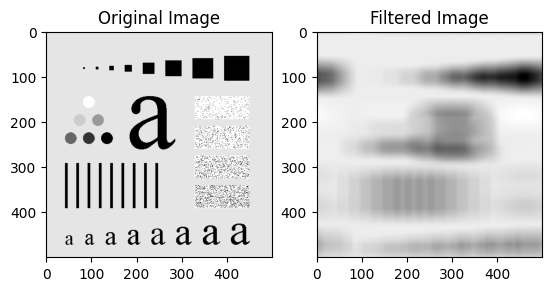

In [2]:
standard_devaition_in_u_direction = 20
standard_devaition_in_v_direction = 70

filter_size_u = 2 * standard_devaition_in_u_direction
filter_size_v = 2 * standard_devaition_in_v_direction

# Create the filter
filter = np.zeros((filter_size_u, filter_size_v))

# calculate the center of the filter
center_u = filter_size_u // 2
center_v = filter_size_v // 2

# calcuate the gaussian filter values
for u in range(filter_size_u):
    for v in range(filter_size_v):
        delta_u = u - center_u
        delta_v = v - center_v

        # Calculate the exponents for the Gaussian function
        exponent_u = (delta_u ** 2) / (2 * standard_devaition_in_u_direction ** 2)
        exponent_v = (delta_v ** 2) / (2 * standard_devaition_in_v_direction ** 2)

        # Calculate the Gaussian filter value at this position
        filter[u, v] = np.exp(-(exponent_u + exponent_v))


# normalize the filter
filter = filter / np.sum(filter)

image_in_freq_domain = np.fft.fft2(sample)
filter_in_freq_domain = np.fft.fft2(filter, s=image_in_freq_domain.shape)

# multiply the image and the filter in the frequency domain
filtered_image = image_in_freq_domain * filter_in_freq_domain

# convert the image back to the spatial domain
filtered_image = np.fft.ifft2(filtered_image)

# display original image and filtered image side by side with correct labels
plt.subplot(121), plt.imshow(sample, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(np.abs(filtered_image), cmap='gray'), plt.title('Filtered Image')
plt.show()



### 2. 
[3 points] Design a Butterworth high-pass filter of order 2 with a cutoff frequency of 50 in the frequency
domain (Refer to slide 73 of Ch3.2.DIPBasicFreq.pdf for the equation). Obtain the filtered image by filtering
the original image Sample with the designed Butterworth filter (i.e., perform the Butterworth high-pass pixel-
wise multiplication operation in the Fourier frequency domain). Display the original image, the Butterworth
high-pass filter (treat it as an image), and the filtered image in Figure 2 with appropriate titles.

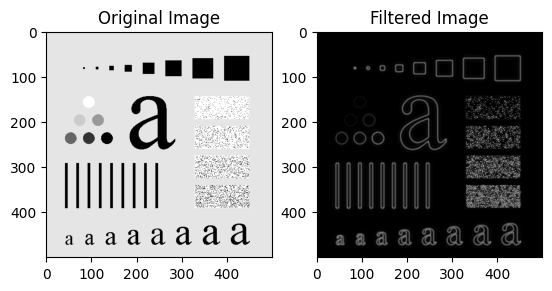

In [3]:
center_u = sample.shape[0] // 2
center_v = sample.shape[1] // 2

cut_off_frequency = 50
filter_order = 2

v_array = np.arange(-center_v, center_v)
u_array = np.arange(-center_u, center_u)

u, v = np.meshgrid(v_array, u_array)

distance_from_center = np.sqrt(u ** 2 + v ** 2)

butterworth_filter = 1-1/(1+(distance_from_center/cut_off_frequency)**(2*filter_order))

# convert image to frequency domain
filtered_image = np.fft.fft2(sample)

# shift the zero frequency component to the center. 
f_shift = np.fft.fftshift(filtered_image)

# # display the f_shift image
# plt.imshow(np.abs(f_shift), cmap='gray')
# plt.show()



filtered_image = f_shift * butterworth_filter

# undo the shifting of the zero frequency component to the center
filtered_image = np.fft.ifftshift(filtered_image)
# transform image back to spatial domain
filtered_image = np.fft.ifft2(filtered_image)

# obtain the magnitude of the ifft result
filtered_image = np.abs(filtered_image)

# display original image and filtered image side by side with correct labels
plt.subplot(121), plt.imshow(sample, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(np.abs(filtered_image), cmap='gray'), plt.title('Filtered Image')
plt.show()



## Problem II: Exercise on Certain Operations in the Frequency Domain [Total: 6 points]


### 1
3 points Apply the Fourier transform on two images Sample and Capital, respectively. Display the
magnitude and the phase of the two Fourier-transformed images in Figure 3 with appropriate titles (Refer to
slide 11 of Ch3.2.DIPBasicFreq.pdf for the equations). Note: Appropriate scaling operations are needed
for proper display due to the large dynamic range in the frequency domain. Specifically, the log
transformation needs to be applied to the magnitude before scaling operation to ensure proper display

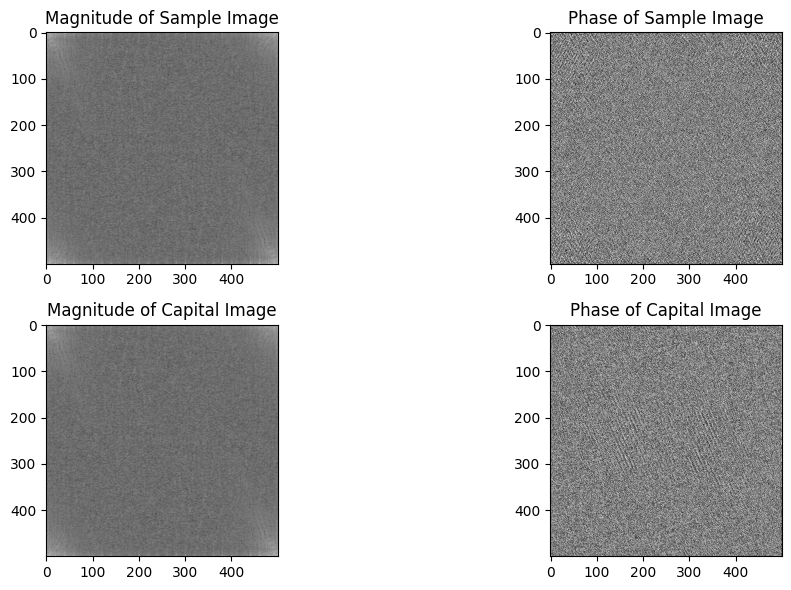

In [4]:

def discreteFourierTransform(image):
    width, height = image.shape
    fourier_image = np.zeros((width, height), dtype=np.complex128)
    for u in range(width):
        for v in range(height):
            sum = 0
            for x in range(width):
                for y in range(height):
                    pixel_value = image[x, y]
                    angle = -2 * np.pi * ((u * x) / width + (v * y) / height)
                    sum += pixel_value * np.exp(1j * angle)
            fourier_image[u, v] = sum
        print("finished row " + str(u))
    return fourier_image

# using the discrete fourier transform function took too long to run so I used the numpy fft function instead

# sample_fft = discreteFourierTransform(sample)
# print("finished the first sample fft")
# capital_fft = discreteFourierTransform(capital)

sample_fft = np.fft.fft2(sample)
capital_fft = np.fft.fft2(capital)


sample_magnetude = np.log1p(np.abs(sample_fft))
sample_phase = np.angle(sample_fft)

capital_magnetude = np.log1p(np.abs(capital_fft))
capital_phase = np.angle(capital_fft)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(sample_magnetude, cmap='gray')
plt.title('Magnitude of Sample Image')

plt.subplot(2, 2, 2)
plt.imshow(sample_phase, cmap='gray')
plt.title('Phase of Sample Image')

plt.subplot(2, 2, 3)
plt.imshow(sample_magnetude, cmap='gray')
plt.title('Magnitude of Capital Image')

plt.subplot(2, 2, 4)
plt.imshow(capital_phase, cmap='gray')
plt.title('Phase of Capital Image')

plt.tight_layout()
plt.show()



### 2
[3 points] Exchange the phase components of the two Fourier-transformed images and take an inverse
Fourier transform. That is, use the phase of Capital and the magnitude of Sample to reconstruct the new
Capital image. Use the phase of Sample and the magnitude of Capital to reconstruct the new Sample image.
Display the two reconstructed images in Figure 4 with appropriate titles.

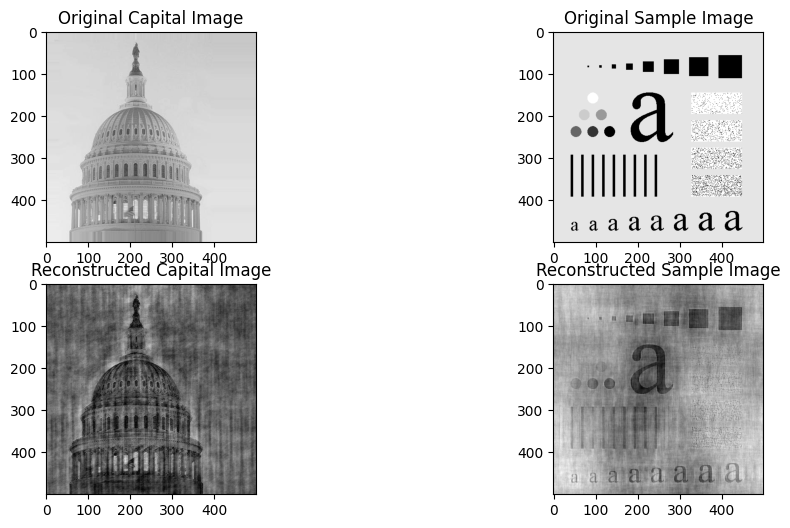

In [5]:
# Perform Fourier Transform on both images
capital_fft = np.fft.fft2(capital)
sample_fft = np.fft.fft2(sample)

# Calculate magnitude and phase components for both images
capital_magnitude = np.abs(capital_fft)
capital_phase = np.angle(capital_fft)
sample_magnitude = np.abs(sample_fft)
sample_phase = np.angle(sample_fft)

# Exchange phase components between the two images
new_capital_fft = np.multiply(sample_magnitude, np.exp(1j * capital_phase))
new_sample_fft = np.multiply(capital_magnitude, np.exp(1j * sample_phase))

# Take the inverse Fourier transform to reconstruct the images
new_capital = np.abs(np.fft.ifft2(new_capital_fft))
new_sample = np.abs(np.fft.ifft2(new_sample_fft))

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1), plt.imshow(capital, cmap='gray')
plt.title("Original Capital Image")
plt.subplot(2, 2, 2), plt.imshow(sample, cmap='gray')
plt.title("Original Sample Image")
plt.subplot(2, 2, 3), plt.imshow(new_capital, cmap='gray')
plt.title("Reconstructed Capital Image")
plt.subplot(2, 2, 4), plt.imshow(new_sample, cmap='gray')
plt.title("Reconstructed Sample Image")
plt.show()

## Problem III: Remove Additive Cosine Noise [Total: 12 points]
The noisy image boy_noisy.gif has been generated by adding some noise in the form of a cosine function. The
task is to remove the cosine interference to restore the original image. This can be done in the Fourier domain
as follows:

### 1 
[1 point] Compute the centered DFT (Discrete Fourier Transform) of the noisy image.

In [6]:
dft = cv2.dft(np.float32(boy_noisey), flags=cv2.DFT_COMPLEX_OUTPUT)
# dft = np.fft.fft2(boy_noisey)
image_dft_shift = np.fft.fftshift(dft) # shift the zero frequency component to the center
# magnitude = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])

### 2
[3 points] Compute the magnitude image of the centered DFT image and find the locations (i.e.,
frequencies) containing the four largest distinct magnitudes by excluding the magnitude at the center
(a very large value). Please design an appropriate function to get this task done

In [7]:
def compute_magnitude_locations(dft_shift,number_of_distinct_magnitudes):
    magnitude = cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])
    center_x, center_y = magnitude.shape[1] // 2, magnitude.shape[0] // 2
    magnitude[center_y, center_x] = 0
    largest_magnitudes = np.argpartition(magnitude, -number_of_distinct_magnitudes, axis=None)[-number_of_distinct_magnitudes:]
    frequencies = np.unravel_index(largest_magnitudes, magnitude.shape)
    return magnitude, largest_magnitudes, frequencies

# Exclude the magnitude at the center
# center_x, center_y = magnitude.shape[1] // 2, magnitude.shape[0] // 2
# magnitude[center_y, center_x] = 0

# Find the locations of the four largest distinct magnitudes
# largest_magnitudes = np.argpartition(magnitude, -4, axis=None)[-4:]

### 3
[3 points] Replace the value at each location found in step 2 in the centered DFT image with the average
of its 8 neighbors. Please design an appropriate function to get this task done

In [8]:
magnitude, largest_magnitudes, frequencies = compute_magnitude_locations(image_dft_shift,4)
def average_eight_neighbors(magnitude, dft_shift, largest_magnitudes):
    for loc in largest_magnitudes:
        y, x = np.unravel_index(loc, magnitude.shape)
        dft_shift[y, x] = np.mean(dft_shift[y-1:y+2, x-1:x+2])
    return dft_shift

restored_image = average_eight_neighbors(magnitude, image_dft_shift.copy(),largest_magnitudes)

### 4
[1 point] Take the inverse DFT transform of the modified centered DFT image and display the original
image and the resultant image side-by-side in Figure 5 with appropriate titles.

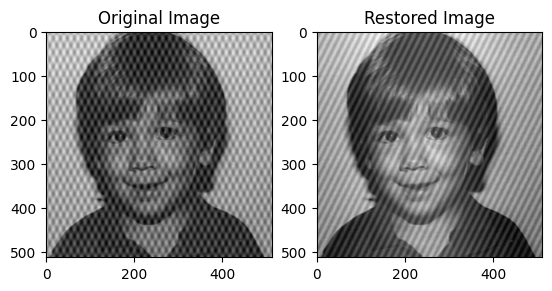

In [9]:
restored_image = np.fft.ifftshift(restored_image)
restored_image = cv2.idft(restored_image)
restored_image = cv2.magnitude(restored_image[:, :, 0], restored_image[:, :, 1])

plt.subplot(1, 2, 1)
plt.imshow(boy_noisey, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image')

plt.show()


### 5
[2 points] Display the following restored images side-by-side in Figure 6 with appropriate titles, where
each restored image is obtained by taking the inverse DFT transform of the modified centered DFT
image produced as follows:

1) Replacing the value at each location in the centered DFT image, which contains the two largest
distinct magnitudes by excluding the magnitude at the center, with the average of its 8
neighbors.
2) Replacing the value at each location in the centered DFT image, which contains the three largest
distinct magnitudes by excluding the magnitude at the center, with the average of its 8
neighbors.
3) Replacing the value at each location in the centered DFT image, which contains the five largest
distinct magnitudes by excluding the magnitude at the center, with the average of its 8
neighbors.
4) Replacing the value at each location in the centered DFT image, which contains the six largest
distinct magnitudes by excluding the magnitude at the center, with the average of its 8
neighbors


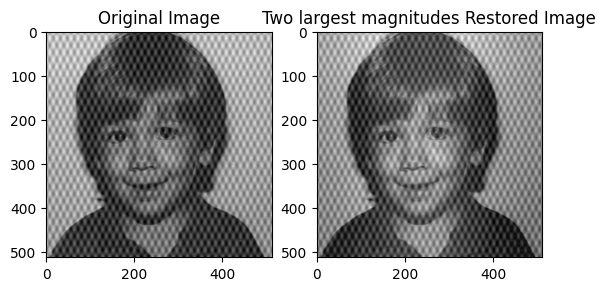

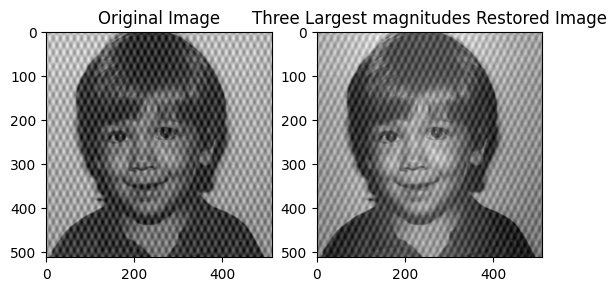

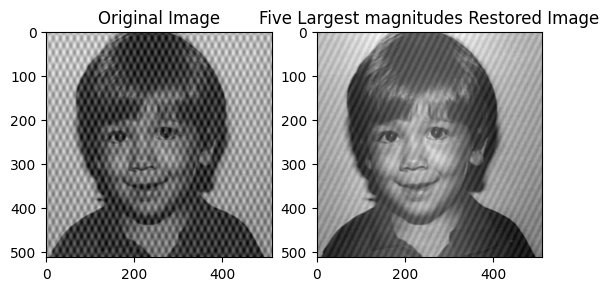

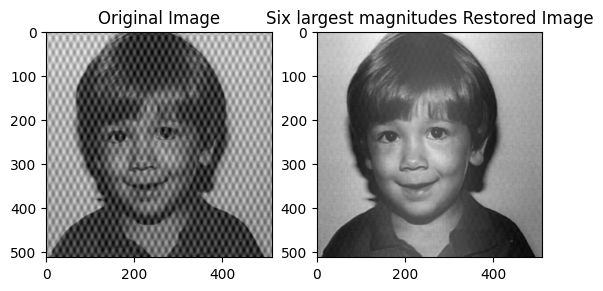

In [10]:
# two largest magnitudes
magnitude, largest_magnitudes, frequencies = compute_magnitude_locations(image_dft_shift,2)
restored_image_two_largest_magnitudes = average_eight_neighbors(magnitude, image_dft_shift.copy(),largest_magnitudes)

restored_image_two_largest_magnitudes = np.fft.ifftshift(restored_image_two_largest_magnitudes)
restored_image_two_largest_magnitudes = cv2.idft(restored_image_two_largest_magnitudes)
restored_image_two_largest_magnitudes = cv2.magnitude(restored_image_two_largest_magnitudes[:, :, 0], restored_image_two_largest_magnitudes[:, :, 1])

plt.subplot(1, 2, 1)
plt.imshow(boy_noisey, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(restored_image_two_largest_magnitudes, cmap='gray')
plt.title('Two largest magnitudes Restored Image')

plt.show()

# three largest magnitudes
magnitude, largest_magnitudes, frequencies = compute_magnitude_locations(image_dft_shift,3)
restored_image_three_largest_magnitudes = average_eight_neighbors(magnitude, image_dft_shift.copy(),largest_magnitudes)

restored_image_three_largest_magnitudes = np.fft.ifftshift(restored_image_three_largest_magnitudes)
restored_image_three_largest_magnitudes = cv2.idft(restored_image_three_largest_magnitudes)
restored_image_three_largest_magnitudes = cv2.magnitude(restored_image_three_largest_magnitudes[:, :, 0], restored_image_three_largest_magnitudes[:, :, 1])

plt.subplot(1, 2, 1)
plt.imshow(boy_noisey, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(restored_image_three_largest_magnitudes, cmap='gray')
plt.title('Three Largest magnitudes Restored Image')

plt.show()

# five largest magnitudes
magnitude, largest_magnitudes, frequencies = compute_magnitude_locations(image_dft_shift,5)
restored_image_five_largest_magnitudes = average_eight_neighbors(magnitude, image_dft_shift.copy(),largest_magnitudes)

restored_image_five_largest_magnitudes = np.fft.ifftshift(restored_image_five_largest_magnitudes)
restored_image_five_largest_magnitudes = cv2.idft(restored_image_five_largest_magnitudes)
restored_image_five_largest_magnitudes = cv2.magnitude(restored_image_five_largest_magnitudes[:, :, 0], restored_image_five_largest_magnitudes[:, :, 1])

plt.subplot(1, 2, 1)
plt.imshow(boy_noisey, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(restored_image_five_largest_magnitudes, cmap='gray')
plt.title('Five Largest magnitudes Restored Image')

plt.show()

# six largest magnitudes
magnitude, largest_magnitudes, frequencies = compute_magnitude_locations(image_dft_shift,6)
restored_image_six_largest_magnitudes = average_eight_neighbors(magnitude, image_dft_shift.copy(),largest_magnitudes)

restored_image_six_largest_magnitudes = np.fft.ifftshift(restored_image_six_largest_magnitudes)
restored_image_six_largest_magnitudes = cv2.idft(restored_image_six_largest_magnitudes)
restored_image_six_largest_magnitudes = cv2.magnitude(restored_image_six_largest_magnitudes[:, :, 0], restored_image_six_largest_magnitudes[:, :, 1])

plt.subplot(1, 2, 1)
plt.imshow(boy_noisey, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(restored_image_six_largest_magnitudes, cmap='gray')
plt.title('Six largest magnitudes Restored Image')

plt.show()



### 6
[2 points] On the console, summarize the differences between the five resultant images (i.e., one image
shown in Figure 5 and four images shown in Figure 6).

In [11]:
print("""With taking the four largest distinct magnitudes and averaging the eight neighbors of each of those magnitudes the image does not have or less visable diagnal noise lines going from down left to right, there is still diagnal lines going from down from right to left though. \n 
      If you take the two largest distinct magnitudes and average the eight neighbors of each of those magnitudes the image has more diagnal noise lines going from down left to right, there is still diagnal lines going from down from right to left though. \n
      If you take the three largest distinct magnitudes and average the eight neighbors of each of those magnitudes the image has less diagnal noise lines going from down left to right it is still there but it is faded a little more, there is still diagnal lines going from down from right to left though. \n
      Taking five largest distinct magnitudes and average like before we get no visible diagnal left to right lines and we get lighter less visiable diagnal down right to left lines. \n
      Taking six largest distinct magnitudes and average like before we get no visible diagnal left to right lines and we get no visible diagnal down right to left lines. \n

      As you increase the distinct magnitudes and average it removes more and more of the noise. \n

      It finds the most dominant frequencies and averages the eight neighbors of those frequencies. to remove those frequencies from the image. The noise or the lines are a repeated pattern so there is going to be a higher amount of frequencies producing those lines. So by averaging the eight neighbors of the most dominant frequencies it removes or reduces the noise. \n
      """)

With taking the four largest distinct magnitudes and averaging the eight neighbors of each of those magnitudes the image does not have or less visable diagnal noise lines going from down left to right, there is still diagnal lines going from down from right to left though. 
 
      If you take the two largest distinct magnitudes and average the eight neighbors of each of those magnitudes the image has more diagnal noise lines going from down left to right, there is still diagnal lines going from down from right to left though. 

      If you take the three largest distinct magnitudes and average the eight neighbors of each of those magnitudes the image has less diagnal noise lines going from down left to right it is still there but it is faded a little more, there is still diagnal lines going from down from right to left though. 

      Taking five largest distinct magnitudes and average like before we get no visible diagnal left to right lines and we get lighter less visiable diagnal 

## Problem IV: Preliminary Wavelet Transform [Total: 12 points]

### 1
[2 points] Call a built-in function to compute the maximum decomposition level for image Lena. Apply a
maximum-level “db2” wavelet decomposition on Lena by using the appropriate function(s). Apply the inverse
wavelet transform to restore the image. Use the “if-else” statement to compare your restored image with the
original image so the appropriate message indicating the equality or inequality between these two images is
displayed. Note: The original and the restored images should be the same.

The original and restored images are the same.


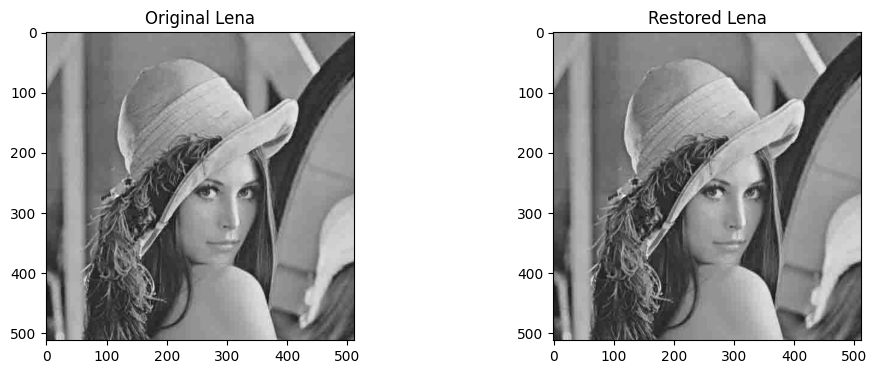

In [12]:
import pywt




# dwt2 

# dwt2 = pywt.dwt2(sample, 'db2')
# ca, ch, cv, cd = pywt.dwt2(sample, 'db2')

# # idwt2
# ca, ch, cv, cd = pywt.dwt2(ca, 'db2')


max_level = pywt.dwt_max_level(lena.shape[0], 'db2')

# Apply the maximum-level "db2" wavelet decomposition
coeffs = pywt.wavedec2(lena, 'db2', level=max_level)

# Reconstruct the image from the wavelet coefficients
restored_lena = pywt.waverec2(coeffs, 'db2')

# Compare the original Lena and the restored Lena
if np.allclose(lena, restored_lena):
    print("The original and restored images are the same.")
else:
    print("The original and restored images are not the same.")

# Display the original and restored images
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(lena, cmap='gray')
plt.title("Original Lena")

plt.subplot(122)
plt.imshow(restored_lena, cmap='gray')
plt.title("Restored Lena")

plt.show()

### 2
[8 points] Apply a 3-level “db2” wavelet decomposition on Lena by using appropriate function(s).
Independently perform the inverse wavelet transform after each of the following operations:
a) Set the 16 values of each 4×4 non-overlapping block in the approximation subband as its average.
b) Set the first level horizontal detail coefficients as 0’s.
c) Set the second level diagonal detail coefficients as 0’s.
d) Set the third level vertical detail coefficients as 0’s.
Display the four reconstructed images in Figures 7, 8, 9, and 10, respectively.
For the above three “set” operations, please do not call built-in functions.

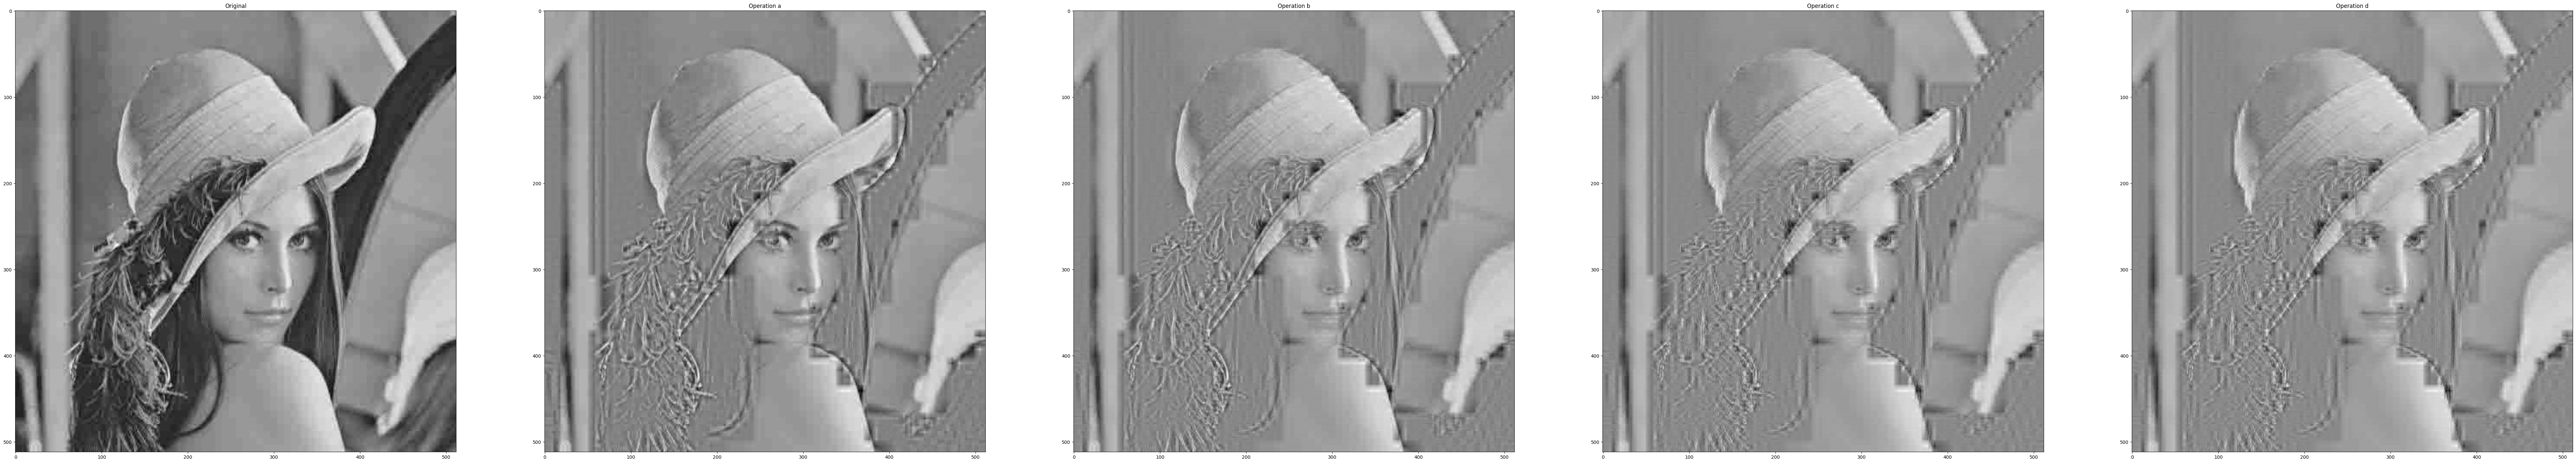

In [13]:
coeffs = pywt.wavedec2(lena, 'db2', level=3)

# Set the 16 values of each 4×4 non-overlapping block in the approximation subband as its average.
# coeffs[0] = pywt.threshold(coeffs[0], np.mean(coeffs[0]), mode='soft')
threshold = np.mean(coeffs[0])
for i in range(0, coeffs[0].shape[0], 4):
    for j in range(0, coeffs[0].shape[1], 4):
        block = coeffs[0][i:i+4, j:j+4]
        block_mean = np.mean(block)
        if abs(block_mean) < threshold:
            coeffs[0][i:i+4, j:j+4] = 0
        else:
            sign = np.sign(block)
            coeffs[0][i:i+4, j:j+4] = sign * (abs(block) - threshold)
reconstructed_a = pywt.waverec2(coeffs, 'db2')

# Set the second level horizontal detail coefficients as 0’s
coeffs[1] = (np.zeros_like(coeffs[1][0]), coeffs[1][1], coeffs[1][2])
reconstructed_b = pywt.waverec2(coeffs, 'db2')

# Set the second level diagonal detail coefficients as 0’s
coeffs[2] = (coeffs[2][0], np.zeros_like(coeffs[2][1]), coeffs[2][2])
reconstructed_c = pywt.waverec2(coeffs, 'db2')

# Set the third level vertical detail coefficients as 0’s
coeffs[3] = (coeffs[3][0], coeffs[3][1], np.zeros_like(coeffs[3][2]))
reconstructed_d = pywt.waverec2(coeffs, 'db2')


plt.figure(figsize=(100, 100))
plt.subplot(1, 5, 1)
plt.imshow(lena, cmap='gray')
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(reconstructed_a, cmap='gray')
plt.title('Operation a')

plt.subplot(1, 5, 3)
plt.imshow(reconstructed_b, cmap='gray')
plt.title('Operation b')

plt.subplot(1, 5, 4)
plt.imshow(reconstructed_c, cmap='gray')
plt.title('Operation c')

plt.subplot(1, 5, 5)
plt.imshow(reconstructed_d, cmap='gray')
plt.title('Operation d')

plt.show()


### 3
[2 points] On the console, summarize the differences between the original image and each of the four
resultant images obtained from a), b), c), and d) and explain why the aforementioned operations caused these
differences.

In [14]:
print("""  The original image has the most detail available. As you go to each operation the image loses more and more detail. Operation a removes the most detail and operation d removes the least amount of detail. \n
      The first operation uses thresholding coefficients at the hightest level of the image by taking the mean of the coefficients and setting the coefficients to 0 if the mean is less than the threshold. This keeps more significant features but gets rid of more noise \n
      The second operation sets the horizontal detail coefficients to 0. This removes the horizontal fine details. It isn't as drastic change in this picture but it does have a small change.  \n
      The third operation sets the diagonal detail coefficients to 0. This removes the diagonal fine details. Same with above can't see a huge difference but the detail is still going down.\n
      The fourth operation sets the vertical detail coefficients to 0. Again another small amount of details removed. The easiest place to see ihis her hair is now smoother. \n
        """)

  The original image has the most detail available. As you go to each operation the image loses more and more detail. Operation a removes the most detail and operation d removes the least amount of detail. 

      The first operation uses thresholding coefficients at the hightest level of the image by taking the mean of the coefficients and setting the coefficients to 0 if the mean is less than the threshold. This keeps more significant features but gets rid of more noise 

      The second operation sets the horizontal detail coefficients to 0. This removes the horizontal fine details. It isn't as drastic change in this picture but it does have a small change.  

      The third operation sets the diagonal detail coefficients to 0. This removes the diagonal fine details. Same with above can't see a huge difference but the detail is still going down.

      The fourth operation sets the vertical detail coefficients to 0. Again another small amount of details removed. The easiest place 

## Problem V: A Simple Solution to Remove Gaussian White Noise [14 points]

### [1 point] Load in Lena and call a built-in function to add Gaussian white noise of 0 mean and 0.01 variance
and save this noisy image as “NoisyLena.bmp”.

In [15]:
lena = cv2.imread('Lena.jpg', 0)

# Add Gaussian white noise
mean = 0
variance = 0.01
noise = np.random.normal(mean, np.sqrt(variance), lena.shape)
noisy_lena = np.uint8(np.clip(lena + noise, 0, 255))

# Save the noisy image
cv2.imwrite('NoisyLena.bmp', noisy_lena)

True

### Denoising Method 1: [10 points]
1. Load in “NoisyLena.bmp”.
2. [1 point] Apply a 3-level “db2” wavelet decomposition on the noisy Lena.
3. [1 point] Estimate the noise standard deviation at the 1st-level diagonal wavelet subband (e.g., HH1) using
𝜎 = [𝑚𝑒𝑑𝑖𝑎𝑛(|𝑓𝑖𝑗 |)/0.6745], where 𝑓𝑖𝑗 represents all wavelet coefficients in the HH1 subband.
4. [1 point] Compute the adaptive threshold t of the 1st-level wavelet subband by 𝑡 = 𝜎√2 ln 𝑀, where M is
the number of coefficients in the 1st-level wavelet subbands (LH1, HL1, and HH1).
5. [4 points] Modify the wavelet coefficients 𝑓𝑖𝑗 in LH1, HL1, and HH1 subbands using the soft thresholding:

𝑓𝑖𝑗
′ = {
𝑓𝑖𝑗 − 𝑡 if 𝑓𝑖𝑗 ≥ 𝑡
𝑓𝑖𝑗 + 𝑡 if 𝑓𝑖𝑗 ≤ −𝑡
0 if |𝑓𝑖𝑗 | < 𝑡

6. [1 point] Apply steps 3, 4, and 5 on the 2nd-level wavelet subbands (e.g., LH2, HL2, and HH2) by using the
information in the 2nd-level subbands (i.e., apply similar ideas explained in steps 3, 4, and 5 on the 2nd-
level wavelet subbands).
7. [1 point] Apply steps 3, 4, and 5 on the 3rd-level wavelet subbands (e.g., LH3, HL3, and HH3) by using the
information in the 3rd-level subbands (i.e., apply similar ideas explained in steps 3, 4, and 5 on the 3rd-level
wavelet subbands).
8. [1 point] Take the inverse wavelet transform to get the denoised image

Text(0.5, 1.0, 'Denoised Method 1')

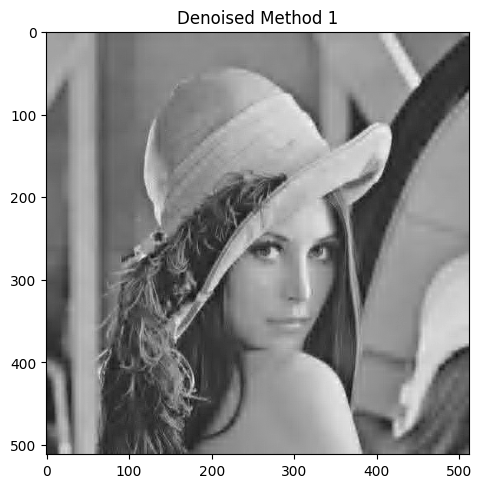

In [16]:
import pywt

# Define a function to perform soft thresholding
# def soft_threshold(coeff, threshold):
#     return np.sign(coeff) * np.maximum(0, np.abs(coeff) - threshold)

# Load the noisy image
noisy_lena = cv2.imread('NoisyLena.bmp', cv2.IMREAD_GRAYSCALE)

wavelet = 'db2'
level = 3

# Perform 3-level wavelet decomposition
coeffs = pywt.wavedec2(noisy_lena, wavelet, level=level)

# Function to estimate the noise standard deviation
def estimate_noise_std_method1(coef):
    hh1 = coeffs[1][2]
    sigma = np.median(np.abs(hh1)) / 0.6745
    return sigma

# Function for soft thresholding
def soft_threshold(x, t):
    return np.where(x >= t, x - t, np.where(x <= -t, x + t, 0))

# Apply soft thresholding to LH1, HL1, and HH1 subbands for each level
def denoise(param_coeffs, param_level,estimaate_noise_func):
    for i in range(param_level):
        for j in range(0, 3):
            coef = param_coeffs[i][j]
            sigma = estimaate_noise_func(coef)
            t = sigma * np.sqrt(2 * np.log(len(coef)))
            new_coef = tuple(soft_threshold(x, t) for x in coef)
            coeffs_list = list(param_coeffs[i])
            coeffs_list[j] = new_coef
            param_coeffs[i] = tuple(coeffs_list)

    return param_coeffs

# Reconstruct the denoised image
denoised_lena_method1 = pywt.waverec2(denoise(coeffs.copy(),3,estimate_noise_std_method1), 'db2')

# Convert the denoised image to 8-bit format
denoised_lena_method1 = np.uint8(denoised_lena_method1)

# Display the denoised image (method 1)
# cv2.imshow('Denoised Method 1', denoised_lena_method1)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(denoised_lena_method1, cmap='gray')
plt.title('Denoised Method 1')

### Denoising Method 2: [1 point]
1. Load in “NoisyLena.bmp”.
2. Apply a 3-level “db2” wavelet decomposition on the noisy Lena.
3. [1 point] Estimate the noise standard deviation at the 1st-level wavelet subband (e.g., LH1, HL1, and HH1)
using 𝜎 = [𝑚𝑒𝑑𝑖𝑎𝑛(|𝑓𝑖𝑗 |)/0.6745], where 𝑓𝑖𝑗 represents all wavelet coefficients in LH1, HL1, and HH1
subbands.
4. Compute the adaptive threshold t of the 1st-level wavelet subbands by 𝑡 = 𝜎√2 ln 𝑀, where M is the
number of coefficients in the 1st-level wavelet subbands (LH1, HL1, and HH1).
5. Modify the wavelet coefficients 𝑓𝑖𝑗 in LH1, HL1, and HH1 subbands using the same soft thresholding
technique summarized in (Eq. 1)
6. Apply steps 3, 4, and 5 on the 2nd-level wavelet subbands (e.g., LH2, HL2, and HH2) by using the
information in the 2nd-level subbands (i.e., apply similar ideas explained in steps 3, 4, and 5 on the 2nd-
level wavelet subbands).
7. Apply steps 3, 4, and 5 on the 3rd-level wavelet subbands (e.g., LH3, HL3, and HH3) by using the
information in the 3rd-level subbands (i.e., apply similar ideas explained in steps 3, 4, and 5 on the 3rd-level
wavelet subbands).
8. Take the inverse wavelet transform to get the denoised image.
Note: The only difference between the Denoising Method 1 and the Denoising Method 2 is the estimation of
the noise standard deviation. Please try to modularize your codes via appropriate functions to provide efficient
solutions.
[2 points] Display the noisy image and the two denoised images obtained by the Desnoising Method 1 and the
Denoising Method 2 side-by-side in Figure 10 and discuss the major differences between the two denoised
images on the console.
You must design appropriate functions for steps 3, 4, and 5 and call these functions to solve this problem.


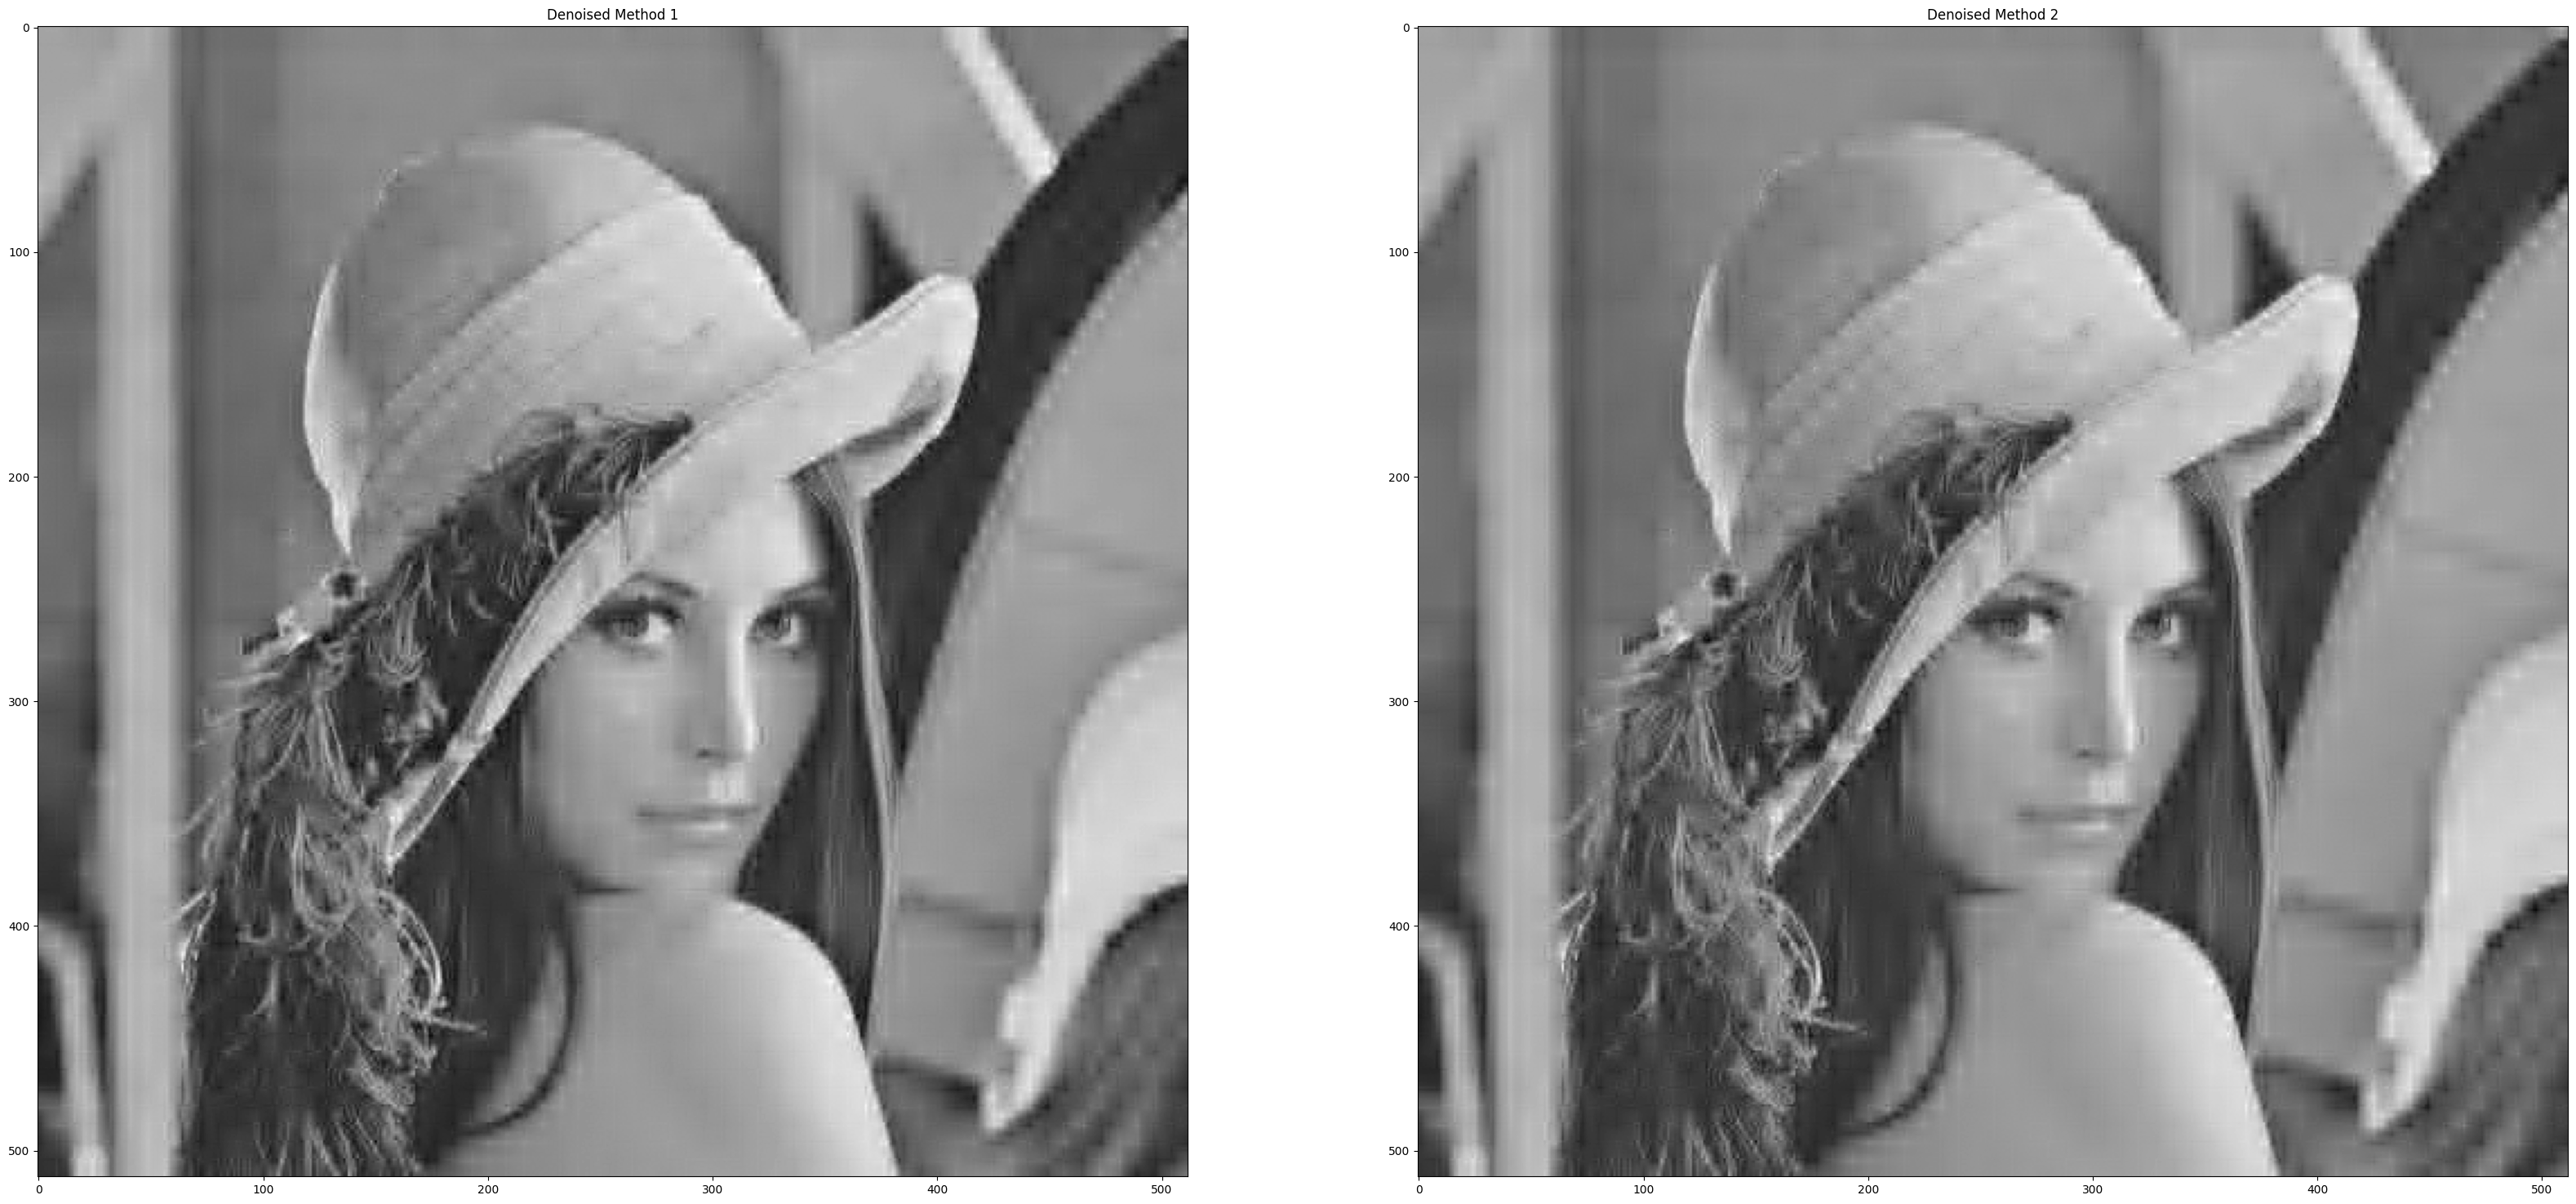

The two denoised images are not the same.
Discuss the differences between the two denoised images:
There isn't really allot of differences between the two images. I cant see much of a difference. Visually there is no difference but at the pixwl level there is a difference. 


In [17]:

def estimate_noise_std_method2(coef):
    # Extract coefficients from LH1, HL1, and HH1 subbands
    lh1, hl1, hh1 = coeffs[1][0], coeffs[1][1], coeffs[1][2]
    # Combine coefficients from all three subbands
    combined_coefficients = np.concatenate((lh1, hl1, hh1))
    # Calculate the noise standard deviation
    sigma = np.median(np.abs(combined_coefficients)) / 0.6745
    return sigma


denoised_lena_method2 = pywt.waverec2(denoise(coeffs.copy(),3,estimate_noise_std_method2), 'db2')

# Display the denoised images from both methods
plt.figure(figsize=(40, 40))
plt.subplot(121)
plt.imshow(denoised_lena_method1, cmap='gray')
plt.title('Denoised Method 1')

plt.subplot(122)
plt.imshow(denoised_lena_method2, cmap='gray')
plt.title('Denoised Method 2')

plt.show()
# Discuss the differences between the two denoised images on the console

# compare the two denoised images
if np.allclose(denoised_lena_method1, denoised_lena_method2):
    print("The two denoised images are the same.")
else:
    print("The two denoised images are not the same.")

print("Discuss the differences between the two denoised images:")
print("There isn't really allot of differences between the two images. I cant see much of a difference. Visually there is no difference but at the pixwl level there is a difference. ")

